In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
Liver_patients = pd.read_csv(r"C:\Users\Meiyappan\Desktop\DS_DATASETS\indian_liver_patient_dataset.csv")

Liver_patients.head()

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0


In [4]:
Liver_patients.shape

(583, 11)

In [5]:
Liver_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      583 non-null    int64  
 1   gender   583 non-null    object 
 2   TB       583 non-null    float64
 3   DB       583 non-null    float64
 4   alkphos  583 non-null    float64
 5   sgpt     583 non-null    float64
 6   sgot     583 non-null    float64
 7   TP       583 non-null    float64
 8   ALB      583 non-null    float64
 9   A_G      583 non-null    float64
 10  class    583 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 50.2+ KB


In [6]:
Liver_patients.describe(include="all")

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.00000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,-685.16578,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,8261.85600,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,-100000.00000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.70000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.92000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.10000,2.000000


In [7]:
# No Null values in the model

In [8]:
# No Outliers present in the model

#### SCALING/TRANSFORMING THE DATA

In [9]:
Liver_patients.columns

Index(['age', 'gender', 'TB', 'DB', 'alkphos', 'sgpt', 'sgot', 'TP', 'ALB',
       'A_G', 'class'],
      dtype='object')

In [10]:
scale = StandardScaler()

Liver_patients[['age', 'TB', 'DB', 'alkphos', 'sgpt', 'sgot', 'TP', 'ALB', 'A_G']] = scale.fit_transform(Liver_patients[['age', 'TB', 'DB', 'alkphos', 'sgpt', 'sgot', 'TP', 'ALB', 'A_G']])

In [11]:
Liver_patients.head()

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,1.252098,Female,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,0.083111,1.0
1,1.066637,Male,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,0.083092,1.0
2,1.066637,Male,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,0.083110,1.0
3,0.819356,Male,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.083124,1.0
4,1.684839,Male,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,0.083051,1.0


#### CATEGORICAL ENCODING

In [12]:
label = LabelEncoder()

Liver_patients["gender"] = label.fit_transform(Liver_patients["gender"])

In [13]:
Liver_patients.head()

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,1.252098,0,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,0.083111,1.0
1,1.066637,1,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,0.083092,1.0
2,1.066637,1,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,0.083110,1.0
3,0.819356,1,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.083124,1.0
4,1.684839,1,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,0.083051,1.0


<AxesSubplot:>

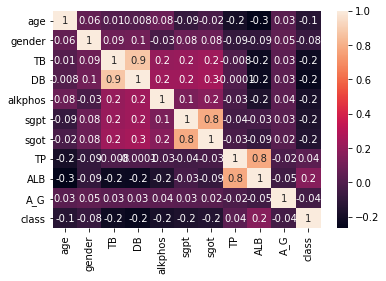

In [14]:
sns.heatmap(Liver_patients.corr(), annot=True, fmt='0.1g')

In [15]:
x = Liver_patients.iloc[:,0:9]

y = Liver_patients["class"]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [17]:
y_train.value_counts()

1.0    329
2.0    137
Name: class, dtype: int64

In [18]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=100)

x_train, y_train = sm.fit_sample(x_train, y_train)

In [19]:
y_train.value_counts()

2.0    329
1.0    329
Name: class, dtype: int64

In [70]:
def SVM_params(X, Y, cv):
    parameters = {"C":[0.001, 0.01, 0.1, 0.5, 0.7, 1, 10],
                  "gamma":[0.001, 0.01, 0.1, 0.3, 0.7, 1]}
    best_grid = GridSearchCV(SVC(kernel = "linear"), parameters, cv=cv, n_jobs=-1)
    best_grid.fit(X,Y)
    return best_grid.best_params_

In [71]:
SVM_params(x_train, y_train, 5)

{'C': 0.1, 'gamma': 0.001}

In [36]:
SVC_clf = SVC(kernel = "linear", C=0.1, gamma=0.001)

SVC_clf.fit(x_train, y_train)

SVC(C=0.1, gamma=0.001, kernel='linear')

In [37]:
SVC_clf.score(x_test, y_test)

0.6068376068376068

In [38]:
SVC_clf.predict(x_test)

array([2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1.,
       1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2.,
       2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2.,
       2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2.,
       2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2.,
       2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1.])

In [39]:
metrics.accuracy_score(y_test, SVC_clf.predict(x_test))

0.6068376068376068

In [40]:
print(metrics.classification_report(y_test, SVC_clf.predict(x_test)))

              precision    recall  f1-score   support

         1.0       0.94      0.51      0.66        87
         2.0       0.39      0.90      0.54        30

    accuracy                           0.61       117
   macro avg       0.66      0.70      0.60       117
weighted avg       0.80      0.61      0.63       117



In [41]:
cross_val_score(SVC_clf, x_test, y_test)

array([0.75      , 0.75      , 0.73913043, 0.73913043, 0.73913043])